# Project: Investigate  a Dataset: No-show appointments Dataset in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.The data is sourced from Kaggle. It can be found [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments) A number of characteristics about the patient are included in each row. The variables of the dataset are :

|Column      | Description |
| :---       | :---: |
|PatientID            |	Identification number of a patient
|AppointmentID        | Identification number appointments
|Gender	              | Male or Female
|ScheduledDay | The day an appointment scheduled
|AppointmentDay | The day of the appointment 
|Age | How old the patient is
|Neighbourhood |Location of appointment
|Scholarship | True of False
|Hipertension | True or False
|Diabetes | True or False
|Alcoholism | True or False
|Handcap | How many disabilities the patient has 
|SMS_received |  True or False
|No-show | Yes or No - ***'Yes'*** indicates patients did not show up while ***'No'*** indicates show up


**Scholarship, Hipertention, Diabetes, Alcoholism, and SMS_received are binary fields ( 0 or 1) - signifying True or False.** 

The Dataset will be analysed to find out the factors that determine whether a patient shows up for their appointment or not. 

***QUESTIONS TO ANSWER***
1. What age group misses the appointment the most ?
2. Are people with scholarship more or less likely to miss appointments ?
3. Which gender shows up for their appointment more ?
4. Do people that receive SMS miss appointments ?
5. Which day of the week is associated with the most No-shows ? 

### Importing libraries that we will be using for investigating the dataset

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines
df_no_show = pd.read_csv("no_show_appointments.csv")
df_no_show.head()                                                  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Dimension of Dataset 
df_no_show.shape

(110527, 14)

The dataset has 110,527 rows and 14 columns

In [4]:
# Check to see the DataType of each column
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the results above,  we can see that :
- There are errors in the naming of some columns (Handcap and Hipertension)
- There is a mix of capital letters and small letters in naming. As per standard, we want all small letters. 
- PatientID is in the wrong data format. It should be an integer not a float 
- ScheduledDay and AppointmentID have the wrong data format. They should be in datetime format.
- There are no null values in the dataset.

All These will be fixed later on. 

In [5]:
# Statistical Properties of dataset 
df_no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the statiscal properties, we can see that minimum value for age is negative ( a negative age is not possible) and maximum value is 115 ( it is possible to have a few people that are these age I will leave 115 but remove all the negative ages later on)

In [6]:
#Checking to see if there are any duplicate values.
df_no_show.duplicated().sum()

0

No duplicate values.

> Now we will move ahead to data cleaning. We have a pretty good idea what the dataset is about and what we need to correct before we go ahead with the analysis.

### Data Cleaning - Correcting the errors we noticed in Dataset

#### 1. Fix Name Errors in Columns and Change Data Type for  Some Columns - ScheduledDay, AppointmentDay and No-Show

In [7]:
# Rename some columns to maintain standard naming format.
df_no_show.rename(columns = {'PatientId':'patient_id', 'AppointmentID':'appointment_id','ScheduledDay':'scheduled_day',
                             'AppointmentDay':'appointment_day','Hipertension':'hypertension', 
                             'Handcap':'handicap', 'No-show':'no_show'}, inplace=True)  

In [8]:
# Replace uppercase with lowercase labels for all columns 
df_no_show.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [9]:
#Check to see the changes made
df_no_show.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Change scheduled_day and appointment_day to DateTime formats
df_no_show['scheduled_day'] = pd.to_datetime(df_no_show['scheduled_day'])

df_no_show['appointment_day'] = pd.to_datetime(df_no_show['appointment_day'])

# Change patient_id from float to int 
df_no_show ['patient_id'] = df_no_show['patient_id'].astype('int64')

In [11]:
# Check to see that all columns are in the correct data format
df_no_show.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

> All columns have now been properly named and are in the correct data type format

#### 2. Delete Negative Values in the Age column 
It is not possible to have a negative age. There might have been a data entry error. 

In [12]:
#Check how many negative values are in the Age column 
(df_no_show.age < 0).sum().sum() 

1

There is only one negative value for age. I will go ahead and drop this row

In [13]:
#Dropping row negative row - removing one row will not make a difference in our analysis.

df_no_show.drop(df_no_show[ df_no_show['age'] < 0 ].index , inplace=True)

print('Negative value in Age column has been deleted')

Negative value in Age column has been deleted


In [14]:
# Checking to see that the negative value has been deleted
df_no_show.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [15]:
# Reset index after deleting one column 
df_no_show.reset_index(drop = True, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we will move on to exploration. I will compute statistics and create visualizations with the goal of addressing the research questions in the Introduction section.
- I will explore one variable at a time. 
- Then follow it up by looking at relationships between variables which will help us answer our research questions 

In [16]:
#Proportion of No shows 
print(df_no_show['no_show'].value_counts())

No     88207
Yes    22319
Name: no_show, dtype: int64


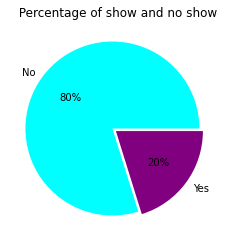

In [17]:
# Pie chart to show proportion of shows vs no show 
no_show_labels = ['No','Yes']
colors = ("cyan", "purple")
explode = (0.05, 0)
plt.pie(df_no_show['no_show'].value_counts(), explode = explode, labels=no_show_labels, colors = colors, autopct='%1.0f%%')
plt.title(' Percentage of show and no show')
plt.show()

- About 20% of patients did not show up for their appointment.

In [18]:
#Proportion of male and female patients 
print(df_no_show.gender.value_counts()) 

F    71839
M    38687
Name: gender, dtype: int64


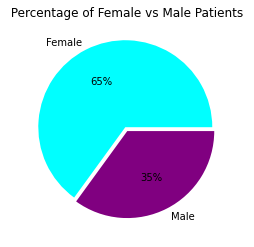

In [19]:
gender_labels = ['Female','Male']
plt.pie(df_no_show['gender'].value_counts(), explode = explode, labels=gender_labels, colors = colors,autopct='%1.0f%%')
plt.title(' Percentage of Female vs Male Patients ')
plt.show() 

- 65% of patients are female while 35% are male.

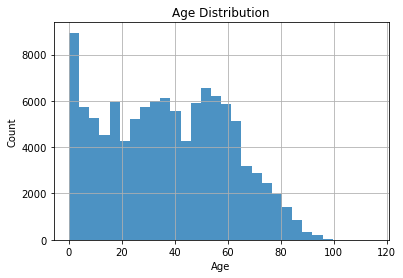

In [20]:
# Age distribution of patients in the dataset 
df_no_show.age.hist(alpha=0.8, bins=30, label='Age')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- Most patients are within the age range of 0 - 65 with only a few older than that

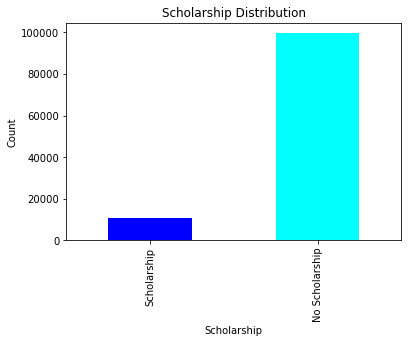

In [21]:
# Scholarship Distribution
df_no_show.scholarship.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("Scholarship")
plt.ylabel('Count')
plt.xticks([0, 1], ['Scholarship', 'No Scholarship'])
plt.title("Scholarship Distribution")
plt.show()

In [22]:
df_no_show.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

- Only 10,861 patients have a Scholarship.

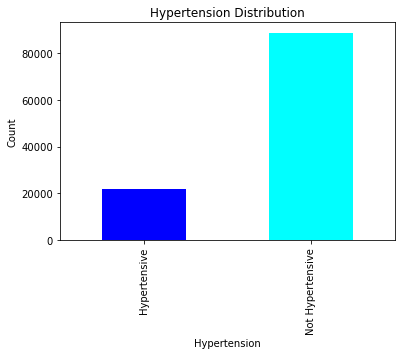

In [23]:
# Hypertension Distribution
df_no_show.hypertension.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("Hypertension")
plt.ylabel('Count')
plt.xticks([0, 1], ['Hypertensive', 'Not Hypertensive'])
plt.title("Hypertension Distribution")
plt.show()

In [24]:
df_no_show.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

- Most patients are not hypertensive. 21,801 patients are. 

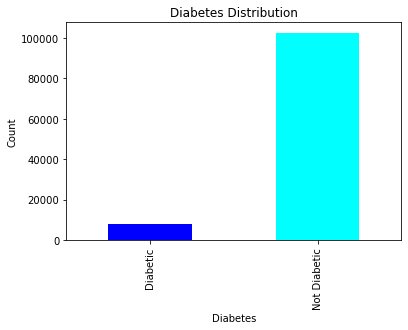

In [25]:
# Diabetes Distribution
df_no_show.diabetes.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("Diabetes")
plt.ylabel('Count')
plt.xticks([0, 1], ['Diabetic', 'Not Diabetic'])
plt.title("Diabetes Distribution")
plt.show()

In [26]:
df_no_show.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

- 7,943 patients are diabetic 

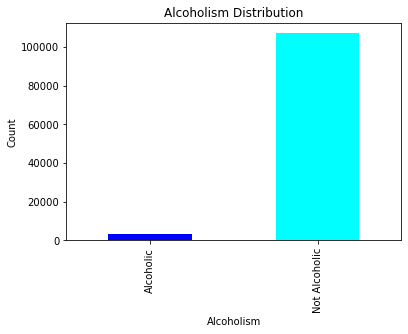

In [27]:
# Alcoholism Distribution
df_no_show.alcoholism.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("Alcoholism")
plt.ylabel('Count')
plt.xticks([0, 1], ['Alcoholic', 'Not Alcoholic'])
plt.title("Alcoholism Distribution")
plt.show()

In [28]:
df_no_show.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

- 3,360 patients are alcoholic

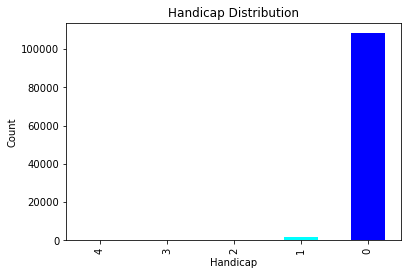

In [29]:
# Handicap Distribution 
df_no_show.handicap.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("Handicap")
plt.ylabel('Count')
plt.title("Handicap Distribution")
plt.show()

In [30]:
df_no_show.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

- Most patients are not handicap. 2,042 have one handicap, 183 have two, 13 have three and only 3 patients have 4 handicap

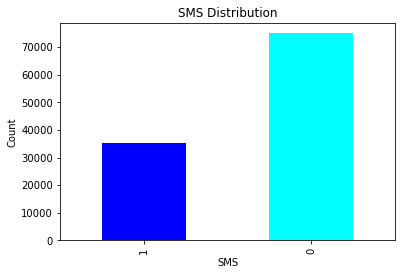

In [31]:
# SMS Distribution
df_no_show.sms_received.value_counts().sort_values().plot(kind = 'bar', color =['blue', 'cyan'])
plt.xlabel("SMS")
plt.ylabel('Count')
plt.title("SMS Distribution")
plt.show()

In [32]:
df_no_show.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

- 35,482 patients received an SMS 

***Summary of findings from Exploratory Analysis of single variables*** 
- About 20% of patients did not show up for their appointment.
- 65% of patients are female while 35% are male.
- Most of the patients don't have a Scholarship.
- Most patients don't have Hypertension, Diabetes and Alcoholism. 
- Majority of patients are not handicap.
- Most of the patients did not receive an SMS. 

### Research Questions  

#### Question 1 - What age group misses the appointment the most ? 

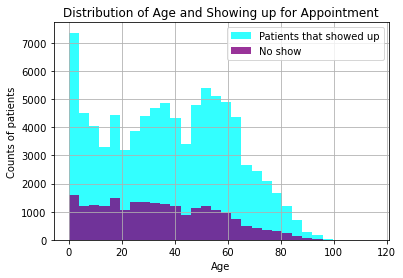

In [33]:
# Plot a histogram to show the relationship between age and not showing up for appointment 

df_no_show.age[df_no_show.no_show == 'No'].hist(alpha=0.8, bins=30, label='Patients that showed up', color='cyan') # Showed up
df_no_show.age[df_no_show.no_show == 'Yes'].hist(alpha=0.8, bins=30, label='No show', color='purple') # No show
plt.title("Distribution of Age and Showing up for Appointment") 
plt.xlabel("Age")
plt.ylabel("Counts of patients")
plt.legend();

- As per the plot, we can see that for both histograms (show and no show) both have a similar distribution. 
- The the younger age group has more people attending their appointments
- The older people (about 65 and above) have fewer number of people showing up for their appointments.

#### Question 2 - Are people with scholarship more or less likely to miss appointments ?

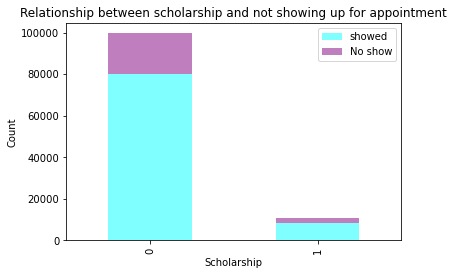

In [34]:
# Plot a bar chart to show this relationship
df_no_show.groupby("scholarship")["no_show"].value_counts().unstack().plot(kind="bar", alpha=0.5, color=['cyan', 'purple'], 
                                                                         stacked=True)
plt.xlabel("Scholarship")
plt.ylabel("Count")
plt.legend(["showed","No show"]);
plt.title("Relationship between scholarship and not showing up for appointment")
plt.show()

The plot shows that patients without scholarship show more than patients with scholarship

In [35]:
# Create a cross tab to show the relationship in percentages 
scholarship_no_show = pd.crosstab(index=df_no_show["scholarship"],
            columns=df_no_show["no_show"]).apply(lambda r: r/r.sum(), axis = 1 ) *100
scholarship_no_show

no_show,No,Yes
scholarship,,
0,80.192645,19.807355
1,76.263696,23.736304


From the results above, we can infer that -
- 80.2% of patients that don't have a scholarship show up for their appointments while the other 19.8% of patients that don't have a scholarship do not show up for their appointments.
- 76.3% of patients that have a scholarship show up for their appointments while the other 23.7% that have a scholarship don't show up.

#### Question 3 - Which gender shows up for or misses appointment the most ? 

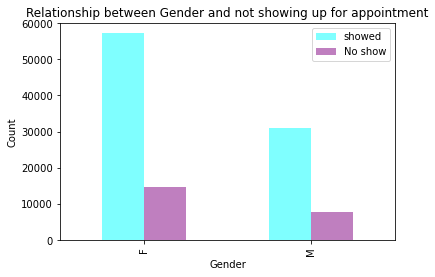

In [36]:
# Plot a bar chart to show this relationship - Gender and No show
df_no_show.groupby("gender")["no_show"].value_counts().unstack().plot(kind="bar", alpha=0.5, color=['cyan', 'purple'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["showed","No show"]);
plt.title("Relationship between Gender and not showing up for appointment")
plt.show()

More females show up for their appointments

In [37]:
#Create a cross tab to show the relationship in numbers 
gender_no_show = pd.crosstab(index=df_no_show["gender"],
            columns=df_no_show["no_show"])
gender_no_show

no_show,No,Yes
gender,,
F,57245,14594
M,30962,7725


- From the above, we can see that more females show up for appointments than males. 
- Also more females miss appointments than men do. 

#### Question 4 - Do people that receive SMS miss appointments ?

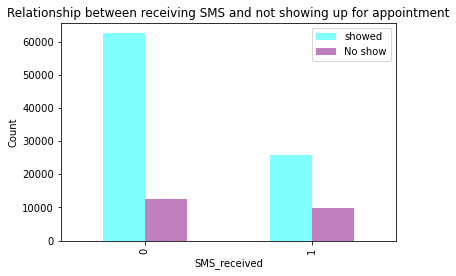

In [38]:
# Plot a bar chart to show this relationship - SMS and No show
df_no_show.groupby("sms_received")["no_show"].value_counts().unstack().plot(kind="bar", alpha=0.5, color=['cyan', 'purple'])
plt.xlabel("SMS_received")
plt.ylabel("Count")
plt.legend(["showed","No show"]);
plt.title("Relationship between receiving SMS and not showing up for appointment")
plt.show()

Receiving SMS has a higher percentage of no shows. From this, we can infer that even those that are receiving an SMS still miss their appointments

In [39]:
# Create a cross tab to show the relationship in percentages
sms_no_show = pd.crosstab(index=df_no_show["sms_received"],
            columns=df_no_show["no_show"]).apply(lambda r: r/r.sum(), axis = 1 ) *100
sms_no_show

no_show,No,Yes
sms_received,,
0,83.296466,16.703534
1,72.425455,27.574545


- Most patients didn't received an SMS.
- 27.6 % of patients who received an SMS missed their appointment while 16.7% of patients who didn't receive an SMS missed their appointments. 

#### Question 5 - Which day of the week is associated with the most No-shows ? 

In [40]:
# create a new column for Day_of_week
df_no_show['day_of_week'] = df_no_show['appointment_day'].dt.day_name()
df_no_show['day_of_week'] # Checking to see the column has been created

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110521    Tuesday
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
Name: day_of_week, Length: 110526, dtype: object

In [41]:
# Number of appointments on each weekday
df_no_show['day_of_week'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

- Wednesday has the most number of appointments followed by Tuesday, Monday, Friday and Thursday.
- Saturday has the least number of appointments.

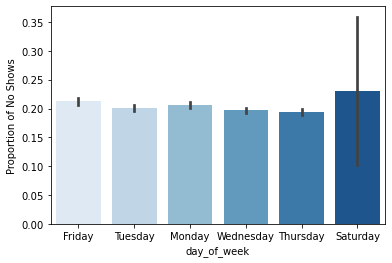

In [42]:
# Plot the average no shows for each day of the week.
g = sns.barplot(x = df_no_show.day_of_week, y = df_no_show.no_show =='Yes',  palette = "Blues")
g.set(ylabel='Proportion of No Shows')
plt.show()

- There are higher incidences of no shows on **Saturdays** and **Fridays** 
- There are extremely low appointments on Saturdays

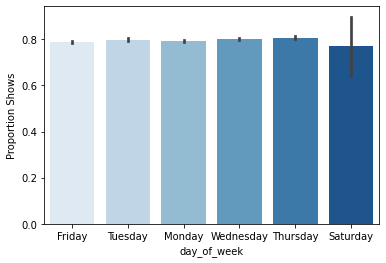

In [43]:
# Plot the average no shows for each day of the week.
g1 = sns.barplot(x = df_no_show.day_of_week, y = df_no_show.no_show =='No',  palette = "Blues")
g1.set(ylabel='Proportion Shows')
plt.show()

- Wednesdays and Thursdays have the highest rate of show ups with the rest of the days following very closely behind. Saturday has the lowest.  

In [44]:
# Create a cross tab to show the percentage of no shows and shows for each day of the week
week_day = pd.crosstab(index = df_no_show['day_of_week'],
           columns = df_no_show['no_show']).apply(lambda r: r/r.sum(), axis = 1 ) *100
week_day

no_show,No,Yes
day_of_week,,
Friday,78.773858,21.226142
Monday,79.351942,20.648058
Saturday,76.923077,23.076923
Thursday,80.645909,19.354091
Tuesday,79.906396,20.093604
Wednesday,80.310821,19.689179


- The table above shows a summary of the percentages of no shows and shows for each day of the week as depicted in plots above.

<a id='conclusions'></a>
## Conclusions

This project investigated a medical appointments dataset from Brazil that is focused on the question of whether or not patients show up for their appointment. I used the following - Python libraries NumPy, Pandas, Matplotlib, and seaborn. 
About 20% of the patients in dataset didn't show up for their appointments. Most of the patients Were females, young, didn't have a scholarship, and are not handicap. Most of the patients scheduled their appointments on Wednesdays and Tuesdays. 
There are several factors that may be causing people to miss their appointments. Some of the variables the analysis looked at include- Age, Scholarship, Gender, Receiving as SMS, Day of the week the appointment was booked. 

The research questions were answered in the analysis and findings have been summarised below - 

> From the analysis we could see that several variable correlated with No Shows. Having a scholarship does not guarantee that patients will show up more for their appointments. Certain days of the week were associated with the highest rate of show ups (Wednesday and Thursday) while Saturday had the least rate of show up. SMS is not an indicator of increased show up. Patients that received an SMS have a higher rate of no show than those who didn't. This is opposite of what the expected case is. 
Although we have seen some variables correlate with no shows, we cannot conclude that they are the factors that cause people to miss their appointments. 

**Limitation of Dataset**
- The data was not collected for a long period of time (only about 40 days ).If we had a longer period, results would've been able to predict who will show up and who will not. There is no data for the reason of why appointment was booked. Having this might be able to give us more insight on what causes people to miss appointments. 

**Areas of further research** 
- Look for trends in patients that have more than one appointment.